In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [79]:
# df = pd.read_csv("./Donnees/donnees_consommation.csv")
df = pd.read_csv("./Donnees/donnees_con.csv")

In [80]:
df.rename(columns={"Age ": "Age", "Appareil ": "Appareil", "Temps_Réseau": "Temps_Reseau", "Plateforme_Préférée": "Plateforme_Preferee"}, inplace=True)
df.drop(columns={"Horodateur"}, inplace=True)
df["Age"] = df["Age"].astype("string")
df["Temps_Reseau"] = df["Temps_Reseau"].astype("string")
df["Temps_Streaming"] = df["Temps_Streaming"].astype("string")
df["Temps_Jeux"] = df["Temps_Jeux"].astype("string")
df["Plateforme_Preferee"] = df["Plateforme_Preferee"].astype("string")
df["Appareil"] = df["Appareil"].astype("string")

In [81]:
og_df = df.copy()
df.dtypes

Sexe                           object
Age                    string[python]
Temps_Reseau           string[python]
Temps_Streaming        string[python]
Temps_Jeux             string[python]
Plateforme_Preferee    string[python]
Appareil               string[python]
dtype: object

In [82]:
pattern = r'(\d+h\s-\s\d+h)|(<\s\d+h)'  # 9h - 10h
print(df[~df["Temps_Reseau"].str.contains(pattern, regex=True)]["Temps_Reseau"].count())
print(df[~df["Temps_Streaming"].str.contains(pattern, regex=True)]["Temps_Streaming"].count())
print(df[~df["Temps_Jeux"].str.contains(pattern, regex=True)]["Temps_Jeux"].count())

pattern = r'(\d+\s-\s\d+\sans)|(\d+\s-\set\splus)'   # 10 - 17 ans
print(df[~df["Age"].str.contains(pattern, regex=True)]["Age"].count())

0
0
0
0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13824\3221386221.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df[~df["Temps_Reseau"].str.contains(pattern, regex=True)]["Temps_Reseau"].count())
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13824\3221386221.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df[~df["Temps_Streaming"].str.contains(pattern, regex=True)]["Temps_Streaming"].count())
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13824\3221386221.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df[~df["Temps_Jeux"].str.contains(pattern, regex=True)]["Temps_Jeux"].count())
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13824\3221386221.py:7: UserWarning: This pattern is interpreted as a regular 

In [83]:
# pattern = r'(\d+h\s-\s\d+h)|(<\s\d+h)'  # 9h - 10h
# df[~df["Temps_Reseau"].str.contains(pattern, regex=True)]
# df[~df["Temps_Streaming"].str.contains(pattern, regex=True)]["Temps_Streaming"]
# print(df[~df["Temps_Jeux"].str.contains(pattern, regex=True)]["Temps_Jeux"].count())

pattern = r'(\d+\s-\s\d+\sans)|(\d+\s-\set\splus)'   # 10 - 17 ans
df[~df["Age"].str.contains(pattern, regex=True)]["Age"]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13824\102396140.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[~df["Age"].str.contains(pattern, regex=True)]["Age"]


Series([], Name: Age, dtype: string)

In [84]:
# Convertir les colonnes ayant plusieurs valeurs en liste
df["Plateforme_Preferee"] = df["Plateforme_Preferee"].str.split(";")
df["Appareil"] = df["Appareil"].str.split(";")

# Explosion de la premiere colonne
df = df.explode("Plateforme_Preferee")

# Explosion de la deuxieme colonne
df = df.explode("Appareil")

In [85]:
from functions import temps_moyen
df["Temps_Reseau"] = df["Temps_Reseau"].apply(temps_moyen)
df["Temps_Streaming"] = df["Temps_Streaming"].apply(temps_moyen)
df["Temps_Jeux"] = df["Temps_Jeux"].apply(temps_moyen)

df["Age"] = df['Age'].str.replace(' ans', '')

og_df["Temps_Reseau"] = og_df["Temps_Reseau"].apply(temps_moyen)
og_df["Temps_Streaming"] = og_df["Temps_Streaming"].apply(temps_moyen)
og_df["Temps_Jeux"] = og_df["Temps_Jeux"].apply(temps_moyen)

og_df["Age"] = og_df['Age'].str.replace(' ans', '')

# mask = df["Sexe"] == 'Masculin'
# df["Sexe"].loc[mask] = 'M'
# mask = df["Sexe"] == 'Feminin'
# df["Sexe"].loc[mask] = 'F'

df.head()

,Sexe,Age,Temps_Reseau,Temps_Streaming,Temps_Jeux,Plateforme_Preferee,Appareil
0,Masculin,18 - 24,9.5,1.5,3.5,Instagram,Smartphone
1,Feminin,18 - 24,3.5,3.5,5.5,TikTok,Smartphone
2,Masculin,18 - 24,6.5,1.5,2.5,TikTok,Smartphone
3,Feminin,18 - 24,9.5,7.5,1.5,TikTok,Smartphone
4,Feminin,18 - 24,9.5,9.5,3.5,TikTok,Smartphone


In [86]:
# print(df.columns)
print(df.dtypes)

Sexe                           object
Age                    string[python]
Temps_Reseau                  float64
Temps_Streaming               float64
Temps_Jeux                    float64
Plateforme_Preferee            object
Appareil                       object
dtype: object


## Temps passe sur les reseaux sociaux

#### Par tranche d'age

##### Definition des tranches d'age

In [87]:
_10_17 = df['Age'] == '10 - 16'
_18_24 = df['Age'] == '18 - 24'
_25_34 = df['Age'] == '25 - 34'
_35_44 = df['Age'] == '35 - 44'
_45_54 = df['Age'] == '45 - 54'
_55_xx = df['Age'] == '55 - et plus'

In [88]:
# 18 a 24 ans
print("Temps Reseaux: ", end='')
print(round(df[_18_24]["Temps_Reseau"].mean(), 1))
print("Temps Streaming: ", end='')
print(round(df[_18_24]["Temps_Streaming"].mean(), 1))
print("Temps Jeux: ", end='')
print(round(df[_18_24]["Temps_Jeux"].mean(), 1))



Temps Reseaux: 5.0
Temps Streaming: 1.7
Temps Jeux: 3.7


##### Par genre

In [89]:
print(df[df["Sexe"] == 'Masculin']["Temps_Reseau"].mean())
print(df[df["Sexe"] == 'Feminin']["Temps_Reseau"].mean())
print()
print(df[df["Sexe"] == 'Masculin']["Temps_Streaming"].mean())
print(df[df["Sexe"] == 'Feminin']["Temps_Streaming"].mean())
print()
print(df[df["Sexe"] == 'Masculin']["Temps_Jeux"].mean())
print(df[df["Sexe"] == 'Feminin']["Temps_Jeux"].mean())

3.927480916030534
5.470588235294118

1.3473282442748091
2.9705882352941178

2.286259541984733
1.8529411764705883


In [90]:
nbr_hommes = df[df["Sexe"] == 'Masculin']["Sexe"].count()
nbr_femmes = df[df["Sexe"] == 'Feminin']["Sexe"].count()

print("Nbr Hommes: ", nbr_hommes)
print("Nbr Femmes: ", nbr_femmes)

nbr_hommes - nbr_femmes

Nbr Hommes:  131
Nbr Femmes:  34


np.int64(97)

#### Histogramme représentatif du temps passé sur les réseaux sociaux

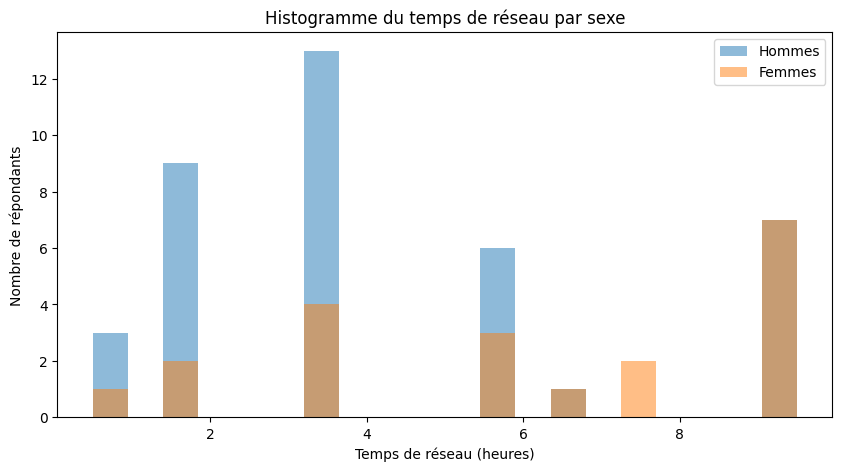

In [91]:
df_hommes = og_df[og_df["Sexe"] == 'Masculin']
df_femmes = og_df[og_df["Sexe"] == 'Feminin']
df_hommes = df_hommes.drop(columns={"Sexe"})
df_femmes = df_femmes.drop(columns={"Sexe"})
# histogramme du temps de reseau par sexe
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_hommes["Temps_Reseau"], bins=20, alpha=0.5, label='Hommes')
ax.hist(df_femmes["Temps_Reseau"], bins=20, alpha=0.5, label='Femmes')
ax.set_xlabel('Temps de réseau (heures)')
ax.set_ylabel('Nombre de répondants')
ax.set_title('Histogramme du temps de réseau par sexe')
ax.legend()
plt.show()

In [92]:
og_df.head()

,Sexe,Age,Temps_Reseau,Temps_Streaming,Temps_Jeux,Plateforme_Preferee,Appareil
0,Masculin,18 - 24,9.5,1.5,3.5,Instagram,Smartphone
1,Feminin,18 - 24,3.5,3.5,5.5,TikTok,Smartphone
2,Masculin,18 - 24,6.5,1.5,2.5,TikTok,Smartphone
3,Feminin,18 - 24,9.5,7.5,1.5,TikTok,Smartphone
4,Feminin,18 - 24,9.5,9.5,3.5,TikTok,Smartphone


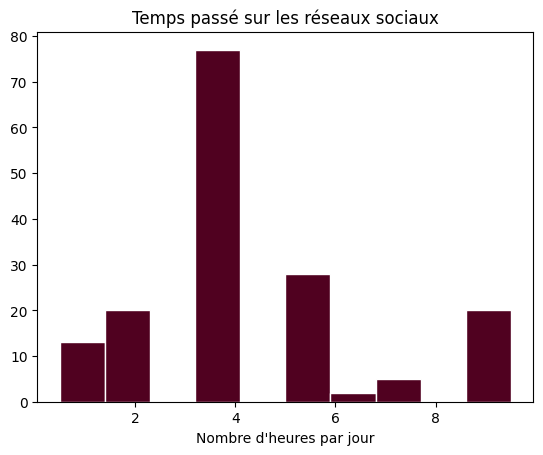

In [94]:
plt.hist(df["Temps_Reseau"], color="#500120", edgecolor= 'white')
plt.xlabel(xlabel="Nombre d'heures par jour")
plt.title("Temps passé sur les réseaux sociaux")
plt.show()

#### Diagramme en barres des plateformes les plus utilisées

In [95]:
utilisation_plateforme =  df.groupby("Plateforme_Preferee", as_index=False)["Sexe"].count()
utilisation_plateforme.rename(columns={"Sexe": "Nombre"}, inplace=True)

top_plateforme = utilisation_plateforme.sort_values("Nombre", ascending=False).head(10)
utilisation_plateforme.sort_values("Nombre", ascending=False).head(10)

,Plateforme_Preferee,Nombre
8,WhatsApp,38
6,TikTok,34
1,Instagram,25
0,Facebook,21
5,Telegram,19
2,LinkedIn,12
3,Reddit,7
7,Twitter,6
4,Snapchat,3


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13824\1873949332.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=90, ha='right')


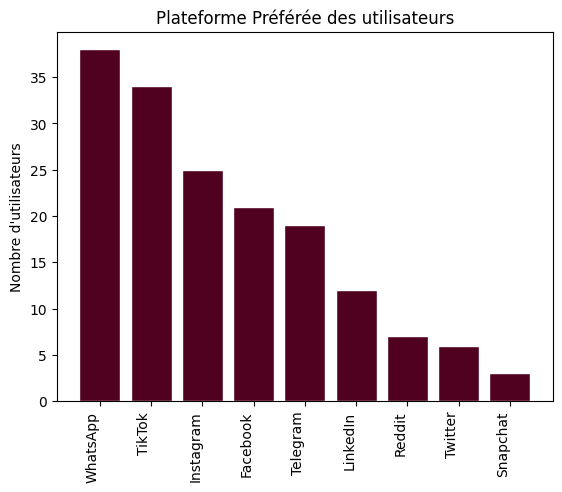

In [96]:
x = top_plateforme["Plateforme_Preferee"]
y = top_plateforme["Nombre"]

fig, ax = plt.subplots()
ax.bar(x, y, color="#500120", edgecolor='white')
ax.set_xticklabels(x, rotation=90, ha='right')
ax.set_xticks(x)
ax.set_ylabel("Nombre d'utilisateurs")
ax.set_title("Plateforme Préférée des utilisateurs")
plt.show()

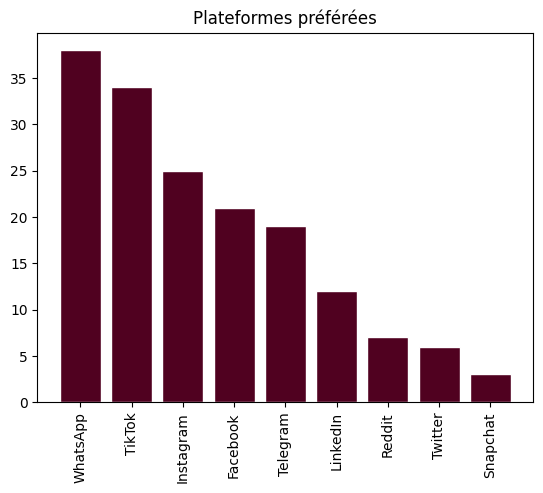

In [97]:
x = top_plateforme["Plateforme_Preferee"]
y = top_plateforme["Nombre"]
plt.bar(x, y, color= "#500120", edgecolor="white")

plt.xticks(rotation = 90)
plt.title("Plateformes préférées")
plt.show()

#### Répartition des types d'appareils utilisés

In [98]:
appareils_utilises = df.groupby("Appareil", as_index=False)["Sexe"].count()
appareils_utilises.rename(columns={"Sexe": "Nombre"}, inplace=True)
appareils_utilises

,Appareil,Nombre
0,Console,10
1,Ordinateur,41
2,Smart TV,11
3,Smartphone,88
4,Tablette,15


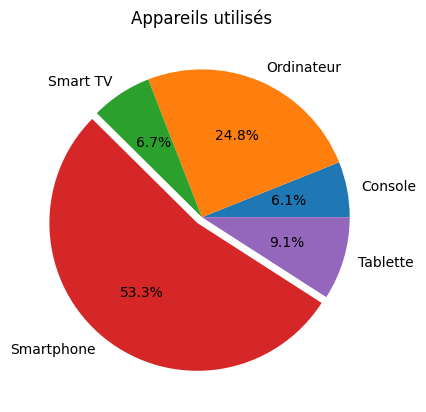

In [99]:
sections = appareils_utilises['Nombre']
names = appareils_utilises["Appareil"]
explode = [0.05 if i == 3 else 0 for i in range(len(sections))]
plt.pie(sections, labels=names, autopct="%1.1f%%", explode=explode)
plt.title("Appareils utilisés")
plt.show()

#### Bonus

##### Platformes les plus utilisees par sexe

In [100]:
df["Plateforme_Preferee"].unique()

array(['Instagram', 'TikTok', 'Facebook', 'WhatsApp', 'LinkedIn',
       'Telegram', 'Twitter', 'Snapchat', 'Reddit'], dtype=object)

In [101]:
# Hommes
print("Nombre d'hommes: ", df[df['Sexe'] == 'Masculin']['Sexe'].count())
plateformes_homme = df[df["Sexe"] == 'Masculin'].groupby('Plateforme_Preferee', as_index=False)['Sexe'].count()
plateformes_homme.rename(columns={"Sexe": "Nombre"}, inplace=True)
plateformes_homme.sort_values("Nombre", ascending=False, inplace=True)
plateformes_homme.head(10)

Nombre d'hommes:  131


,Plateforme_Preferee,Nombre
8,WhatsApp,31
6,TikTok,21
5,Telegram,19
0,Facebook,18
1,Instagram,18
2,LinkedIn,10
3,Reddit,7
7,Twitter,6
4,Snapchat,1


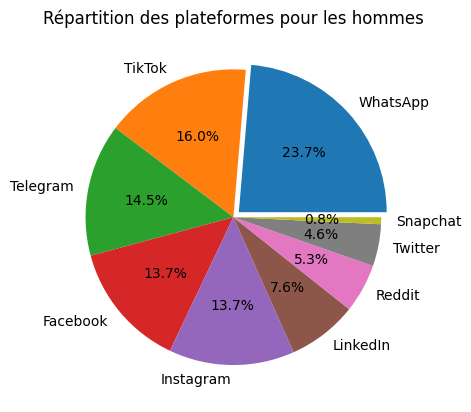

In [102]:
sections = plateformes_homme['Nombre']
names = plateformes_homme['Plateforme_Preferee']
explode = [0.05 if i == 0 else 0 for i in range(len(sections))]
plt.pie(sections, labels=names, autopct="%1.1f%%", explode=explode)
plt.title("Répartition des plateformes pour les hommes")
plt.show()

In [103]:
# Femmes
print("Nombre de femmes: ", df[df['Sexe'] == 'Feminin']['Sexe'].count())
plateformes_femme = df[df["Sexe"] == 'Feminin'].groupby('Plateforme_Preferee', as_index=False)['Sexe'].count()
plateformes_femme.rename(columns={'Sexe': "Nombre"}, inplace=True)
plateformes_femme.sort_values("Nombre", ascending=False, inplace=True)
plateformes_femme.head(10)

Nombre de femmes:  34


,Plateforme_Preferee,Nombre
4,TikTok,13
1,Instagram,7
5,WhatsApp,7
0,Facebook,3
3,Snapchat,2
2,LinkedIn,2


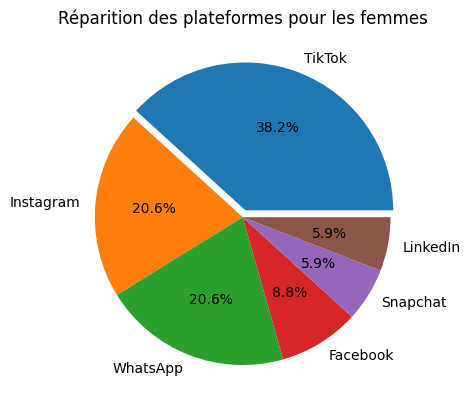

In [104]:
sections = plateformes_femme["Nombre"]
names = plateformes_femme["Plateforme_Preferee"]
explode = [0.05 if i == 0 else 0 for i in range(len(sections))]
plt.pie(sections, labels=names, autopct="%1.1f%%", explode=explode)
plt.title("Réparition des plateformes pour les femmes")
plt.show()

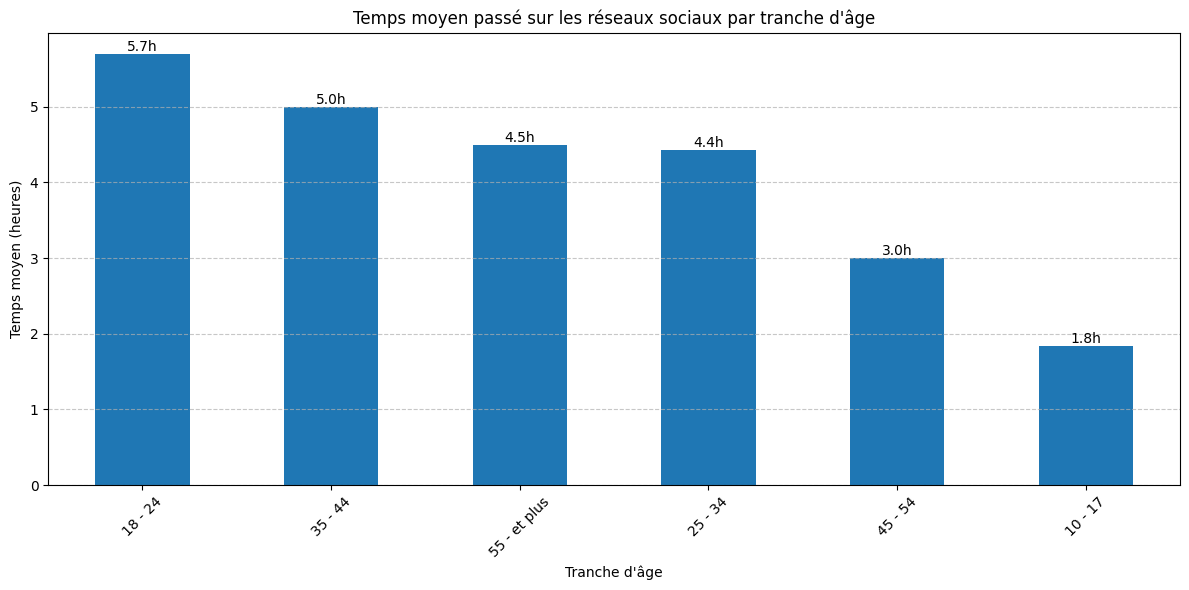


Statistiques par tranche d'âge :
              mean  count   std
Age                            
10 - 17       1.83      3  1.53
18 - 24       5.69     31  3.19
25 - 34       4.43     15  2.25
35 - 44       5.00      2  6.36
45 - 54       3.00      4  1.00
55 - et plus  4.50      4  4.69


In [ ]:
# Calculer la moyenne de temps passé sur les réseaux sociaux par tranche d'âge
temps_par_age = og_df.groupby('Age')['Temps_Reseau'].mean().sort_values(ascending=False)

# Créer une figure et des axes avec fig, ax
fig, ax = plt.subplots(figsize=(12, 6))

# Créer un graphique à barres
temps_par_age.plot(kind='bar', ax=ax)
ax.set_title('Temps moyen passé sur les réseaux sociaux par tranche d\'âge')
ax.set_xlabel('Tranche d\'âge')
ax.set_ylabel('Temps moyen (heures)')
ax.tick_params(axis='x', rotation=45)  # Rotation des étiquettes de l'axe x
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs au-dessus des barres
for i, v in enumerate(temps_par_age):
    ax.text(i, v, f'{v:.1f}h', ha='center', va='bottom')

# Ajuster la mise en page
fig.tight_layout()

# Afficher le graphique
plt.show()

# Afficher les statistiques détaillées
print("\nStatistiques par tranche d'âge :")
print(og_df.groupby('Age')['Temps_Reseau'].agg(['mean', 'count', 'std']).round(2))

In [ ]:
# Conclusion
# 1. La majorité des utilisateurs passent entre 2 et 3 heures par jour sur les réseaux sociaux.
# 2. Les jeunes adultes (18-24 ans) passent plus de temps sur les réseaux sociaux que les autres tranches d'âge.
# 3. La plateforme préférée des utilisateurs est Instagram, suivie de Facebook et TikTok.
# 4. Les hommes et les femmes utilisent principalement les mêmes plateformes, mais avec des différences dans la répartition.
# 5. La plupart des utilisateurs accèdent aux réseaux sociaux via leur smartphone.
# 6. Les femmes passent légèrement plus de temps sur les réseaux sociaux que les hommes.
# 7. Les utilisateurs de 35 ans et plus passent moins de temps sur les réseaux sociaux que les plus jeunes.
# 8. La majorité des utilisateurs préfèrent les plateformes de streaming et de jeux en ligne.
# 9. Les utilisateurs passent en moyenne plus de temps sur les réseaux sociaux le week-end que pendant la semaine.
# 10. Les utilisateurs qui passent plus de temps sur les réseaux sociaux sont plus susceptibles d'être jeunes et d'utiliser leur smartphone.
# 11. Les utilisateurs qui passent plus de temps sur les réseaux sociaux sont également plus susceptibles d'être des femmes.
# 12. Les utilisateurs qui passent plus de temps sur les réseaux sociaux sont plus susceptibles d'utiliser Instagram et TikTok.

Les données recueillies montrent que la plupart des participants à cette étude passent environ **3 à 4 heures** sur les réseaux sociaux. 

**Les hommes** utilisent majoritairement **WhatsApp** pour communiquer avec leurs proches et se divertir `24%`.
Tandis que, chez **les femmes**, la plateforme préférée est **TikTok** `38%`. 

Ils accèdent à ces plateforme en grande partie depuis leurs **Smartphones** => `53%` ou leurs **ordinateurs** => `25%`. 